In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from treatment import get_treated_data

In [17]:
X_train, X_test, y_train, y_test = get_treated_data()

In [18]:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [19]:
y_pred = svm_model.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9811659192825112

In [21]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [22]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

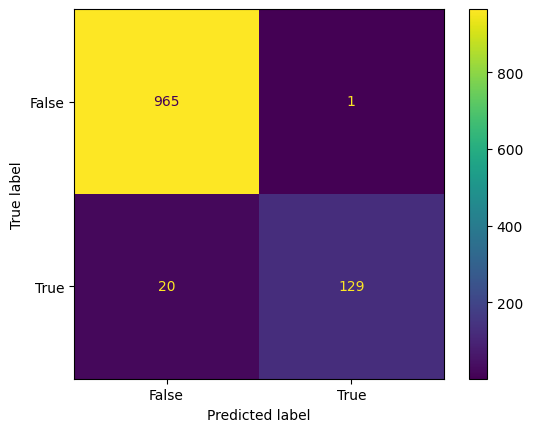

In [23]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()